<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных-из-файла" data-toc-modified-id="Обзор-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

**Иcходные данные**

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

***Описание тарифов***
1. Тариф «Смарт»
    * Ежемесячная плата: 550 рублей
    * Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    * Стоимость услуг сверх тарифного пакета:
        * минута разговора: 3 рубля
        * сообщение: 3 рубля
        * 1 Гб интернет-трафика: 200 рублей
        

2. Тариф «Ультра»
    * Ежемесячная плата: 1950 рублей
    * Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    * Стоимость услуг сверх тарифного пакета:
        * минута разговора: 1 рубль
        * сообщение: 1 рубль
        * 1 Гб интернет-трафика: 150 рублей
        
***Примечание***

*«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.*

*Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.*

**Цель исследования**

Сделать предварительный анализ тарифов на небольшой выборке клиентов. 

Проанализировать поведение клиентов и сделать вывод — какой тариф приносит большую прибыль.

**Ход исследования**
1. Обзор данных.
2. Предобработка данных.
3. Анализ данных.
4. Проверка гипотез.

## Обзор данных из файла

Выполним первичный обзор данных

In [21]:
#импортируем библиотеки pandas, numpy, pyplot, random, os, пакета stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from scipy import stats as st
import os

In [22]:
#прочитаем файлы с данными и сохраним в переменных для локальной и сетевой работы
calls1 = 'calls.csv'
calls2 = '/datasets/calls.csv'
internet1 = 'internet.csv'
internet2 = '/datasets/internet.csv'
messages1 = 'messages.csv'
messages2 = '/datasets/messages.csv'
tariffs1 = 'tariffs.csv'
tariffs2 = '/datasets/tariffs.csv'
users1 = 'users.csv'
users2 = '/datasets/users.csv'

ways = {'calls': [calls1, calls2], 'internet': [internet1, internet2], 'messages': [messages1, messages2], 'tariffs': [tariffs1, tariffs2], 'users': [users1, users2]}

for name, way in ways.items():
    if os.path.exists(way[0]):
        globals()[name] = pd.read_csv(way[0])
    elif os.path.exists(way[1]):
        globals()[name] = pd.read_csv(way[1])
    else:
        print('Что-то пошло не так :(')

In [23]:
list_of_df = {'Звонки': calls, 'Интернет': internet, 'Сообщения': messages, 'Пользователи': users, 'Тарифы': tariffs}

for df in list_of_df.values():
    display(df.info())
    display(df.head(10))
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Согласно документации к данным, таблицы и названия колонок отражают следующую информацию:

1. Таблица **users** (информация о пользователях):
    * `user_id` — уникальный идентификатор пользователя
    * `first_name` — имя пользователя
    * `last_name` — фамилия пользователя
    * `age` — возраст пользователя (годы)
    * `reg_date` — дата подключения тарифа (день, месяц, год)
    * `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    * `city` — город проживания пользователя
    * `tariff` — название тарифного плана


2. Таблица **calls** (информация о звонках):
    * `id` — уникальный номер звонка
    * `call_date` — дата звонка
    * `duration` — длительность звонка в минутах
    * `user_id` — идентификатор пользователя, сделавшего звонок


3. Таблица **messages** (информация о сообщениях):
    * `id` — уникальный номер сообщения
    * `message_date` — дата сообщения
    * `user_id` — идентификатор пользователя, отправившего сообщение


4. Таблица **internet** (информация об интернет-сессиях):
    * `id` — уникальный номер сессии
    * `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
    * `session_date` — дата интернет-сессии
    * `user_id` — идентификатор пользователя


5. Таблица **tariffs** (информация о тарифах):
    * `tariff_name` — название тарифа
    * `rub_monthly_fee` — ежемесячная абонентская плата в рублях
    * `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
    * `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
    * `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    * `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    * `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
    * `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

На основании обзора данных установлено:

Всего у нас 5 таблиц с различным количеством строк. Названия всех колонок соответствуют стилю.

В таблице **internet**:
* Присутсвуеть столбец `Unnamed: 0` дублирующий индекс. Его необходимо удалить.
* Столбец `session_date` имеет тип object. Необходимо изменить на date.
* Необходимо рассчитать общий объем трафика для каждого пользователя за месяц и округлить до Гб в большую сторону.

В таблице **calls**:
* Столбец `call_date` имеет тип object. Необходимо изменить на date.
* В столбце `duration` нужно округлить дааные до минут в большую сторону или создать отдельный столбец с округленными значениями.

В таблице **messages**:
* Столбец `messages_date` имеет тип object. Необходимо изменить на date.

В таблице **users**:
* Столбцы `churn_date` и `reg_date` имееют тип object. Необходимо изменить на date.
* Столбец `churn_date` имеет всего 38 строк без пропусков. Т.е. 38 клиентов из 500 закрыли тарифы.

Пропусков, которые необходимо заполнить, в таблицах нет.

Необходимо проверить данные на дублекаты и аномальные значения.

### Вывод

Мы имеем достаточный объем выборки, чтобы расчитать примерную прибольность каждого тарифа.

Однако, прежде чем приступить к анализу, изменим типы данных в столбцах с датами, а также проверим данные на аномалии и дубликаты.

## Предобработка данных

В каждой таблице изменим тип данных столбцов, содержащих даты на date.

In [24]:
for df in list_of_df.values():
    for column in df.columns:
        if '_date' in column:
            df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')

In [25]:
# проверка результата

for df in list_of_df.values():
    display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

Проверим наличие аномалий в данных.

In [26]:
# посмотрим какие значения есть
for name, df in list_of_df.items():
    print(f'Таблица "{name}"')
    for column in df.columns:
        print(f'Список значений в столбце {column}:')
        print(df[column].value_counts())
        print()

Таблица "Звонки"
Список значений в столбце id:
1057_577    1
1437_20     1
1415_485    1
1164_302    1
1021_35     1
           ..
1065_102    1
1444_163    1
1454_255    1
1467_159    1
1469_550    1
Name: id, Length: 202607, dtype: int64

Список значений в столбце call_date:
2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

Список значений в столбце duration:
0.00     39613
5.50       142
4.49       142
6.15       141
6.38       141
         ...  
26.32        1
24.51        1
27.24        1
29.89        1
27.43        1
Name: duration, Length: 2871, dtype: int64

Список значений в столбце user_id:
1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

Табл

На первый взгляд аномалий не выявлено.

Проверим дублекаты.

In [27]:
for name, df in list_of_df.items():
    print(name)
    print(df.duplicated().sum())
    print()

Звонки
0

Интернет
0

Сообщения
0

Пользователи
0

Тарифы
0



**Далее нам необходимо для каждого пользователя посчитать:**
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Для этого:
1. В таблице "Звонки" округлим значения большую сторону (кроме 0). Создадим столбец с месяцем. Сгрупируем по user_id и месяцам. Посчитаем количество звонков длительностью больше 0. Посчитаем количество израсходованных минут.
2. В таблице "Сообщения" создадим столбец с месяцем. Сгрупируем по user_id и месяцам. Посчитаем количество израсходованных сообщений.
3. В таблице "Интернет" создадим столбец с месяцем. Сгрупируем по user_id и месяцам. Посчитаем количество посчитаем количество израсходованного трафика за месяц, округлив до Гб.
4. Создадим таблицу "Выручка" с user_id, столбцами с месяцами, израсходованными за месяц минутами, сообщениями и Гб. Посчитаем для каждой строки выручку. 

Обработаем данные таблицы **calls**

In [28]:
#создадим столбец с месяцем
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

#создадим список с округлением звонков длительностью больше 1 с в большую сторону
calls['duration_round'] = np.ceil(calls['duration'])

#проверим результат
calls.head()

,id,call_date,duration,user_id,month,duration_round
0,1000_0,2018-07-25,0.00,1000,7,0.0
1,1000_1,2018-08-17,0.00,1000,8,0.0
2,1000_2,2018-06-11,2.85,1000,6,3.0
3,1000_3,2018-09-21,13.80,1000,9,14.0
4,1000_4,2018-12-15,5.18,1000,12,6.0


In [29]:
#сгруппируем данные по пользователям и месяцам
calls_user_to_month = calls.pivot_table(index=['user_id', 'month'], values='duration_round', aggfunc=['count', 'sum'])

#меняем названия столбцов
calls_user_to_month.columns = ['calls_count', 'calls_sum_duration']

#смотрим результат
calls_user_to_month.head(10)

calls_count  calls_sum_duration
user_id month                                 
1000    5               22               159.0
        6               43               172.0
        7               47               340.0
        8               52               408.0
        9               58               466.0
        10              57               350.0
        11              43               338.0
        12              46               333.0
1001    11              59               430.0
        12              63               414.0

Обработаем данные таблицы **messages**

In [30]:
#создадим столбец с месяцем
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

#сгруппируем данные по пользователям и месяцам
messages_user_to_month = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')

#меняем название столбца
messages_user_to_month.columns = ['messages_count']

#смотрим результат
messages_user_to_month.head(10)

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
        10                 73
        11                 58
        12                 70
1002    6                   4
        7                  11

Обработаем данные таблицы **internet**

In [31]:
#создадим столбец с месяцем
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

#сгруппируем данные по пользователям и месяцам
internet_user_to_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')

#меняем название столбца
internet_user_to_month.columns = ['mb_used_sum']

#создаем столбец с округлением до Гб
internet_user_to_month['gb_used_sum'] = np.ceil(internet_user_to_month['mb_used_sum'] / 1024)

#удалим столбец с Мб
internet_user_to_month = internet_user_to_month.drop(columns=['mb_used_sum'])


#смотрим результат
internet_user_to_month.head(10)

gb_used_sum
user_id month             
1000    5              3.0
        6             23.0
        7             14.0
        8             14.0
        9             15.0
        10            15.0
        11            15.0
        12            10.0
1001    11            18.0
        12            14.0

Для посчета помесячной выручки с каждого пользователя создадим таблицу **revenue**.

In [32]:
revenue = calls_user_to_month.merge(messages_user_to_month, on=['user_id', 'month'], how='outer')
revenue = revenue.merge(internet_user_to_month, on=['user_id', 'month'], how='outer')
#revenue = revenue.drop(columns='mb_used_sum', axis=1)

#проверим результат
revenue.head(10)

calls_count  calls_sum_duration  messages_count  gb_used_sum
user_id month                                                              
1000    5             22.0               159.0            22.0          3.0
        6             43.0               172.0            60.0         23.0
        7             47.0               340.0            75.0         14.0
        8             52.0               408.0            81.0         14.0
        9             58.0               466.0            57.0         15.0
        10            57.0               350.0            73.0         15.0
        11            43.0               338.0            58.0         15.0
        12            46.0               333.0            70.0         10.0
1001    11            59.0               430.0             NaN         18.0
        12            63.0               414.0             NaN         14.0

In [33]:
#заменим пропуски на 0 
revenue = revenue.fillna(0)

#проверим результат
revenue.head(10)

calls_count  calls_sum_duration  messages_count  gb_used_sum
user_id month                                                              
1000    5             22.0               159.0            22.0          3.0
        6             43.0               172.0            60.0         23.0
        7             47.0               340.0            75.0         14.0
        8             52.0               408.0            81.0         14.0
        9             58.0               466.0            57.0         15.0
        10            57.0               350.0            73.0         15.0
        11            43.0               338.0            58.0         15.0
        12            46.0               333.0            70.0         10.0
1001    11            59.0               430.0             0.0         18.0
        12            63.0               414.0             0.0         14.0

In [34]:
#сбросим мультииндекс
revenue = revenue.reset_index()
revenue.head()

,user_id,month,calls_count,calls_sum_duration,messages_count,gb_used_sum
0,1000,5,22.0,159.0,22.0,3.0
1,1000,6,43.0,172.0,60.0,23.0
2,1000,7,47.0,340.0,75.0,14.0
3,1000,8,52.0,408.0,81.0,14.0
4,1000,9,58.0,466.0,57.0,15.0


In [35]:
#добавим столбцы с тарифным планом и городом (для дальнейшего анализа)
revenue = revenue.merge(users[['user_id', 'tariff', 'city']], on='user_id', how='left')
revenue = revenue.rename(columns={'tariff': 'tariff_name'})

revenue.head()

,user_id,month,calls_count,calls_sum_duration,messages_count,gb_used_sum,tariff_name,city
0,1000,5,22.0,159.0,22.0,3.0,ultra,Краснодар
1,1000,6,43.0,172.0,60.0,23.0,ultra,Краснодар
2,1000,7,47.0,340.0,75.0,14.0,ultra,Краснодар
3,1000,8,52.0,408.0,81.0,14.0,ultra,Краснодар
4,1000,9,58.0,466.0,57.0,15.0,ultra,Краснодар


In [36]:
#добавим столбцы с лимитами по тарифным планам
revenue = revenue.merge(tariffs, on='tariff_name', how='left')
revenue.head()

,user_id,month,calls_count,calls_sum_duration,messages_count,gb_used_sum,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,3.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,15.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1


In [37]:
#создадим столбец с доп выручкой по звонкам
revenue['up_revenue_rub_call'] = (revenue['calls_sum_duration'] - revenue['minutes_included']) * revenue['rub_per_minute']
revenue.loc[revenue['up_revenue_rub_call'] < 0, ['up_revenue_rub_call']] = 0

#создадим столбец с доп выручкой по сообщениям
revenue['up_revenue_rub_messages'] = (revenue['messages_count'] - revenue['messages_included']) * revenue['rub_per_message']
revenue.loc[revenue['up_revenue_rub_messages'] < 0, ['up_revenue_rub_messages']] = 0

#создадим столбец с доп выручкой по интернету
revenue['up_revenue_rub_internet'] = (revenue['gb_used_sum'] - revenue['mb_per_month_included'] / 1024) * revenue['rub_per_gb']
revenue.loc[revenue['up_revenue_rub_internet'] < 0, ['up_revenue_rub_internet']] = 0

#создадим столбец с общей выручкой
revenue['revenue_rub'] = revenue['up_revenue_rub_call'] + revenue['up_revenue_rub_messages'] + revenue['up_revenue_rub_internet'] + revenue['rub_monthly_fee']

#посмотрим итог
revenue.head(15)

,user_id,month,calls_count,calls_sum_duration,messages_count,gb_used_sum,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,up_revenue_rub_call,up_revenue_rub_messages,up_revenue_rub_internet,revenue_rub
0,1000,5,22.0,159.0,22.0,3.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,43.0,172.0,60.0,23.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7,47.0,340.0,75.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8,52.0,408.0,81.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9,58.0,466.0,57.0,15.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
5,1000,10,57.0,350.0,73.0,15.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
6,1000,11,43.0,338.0,58.0,15.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
7,1000,12,46.0,333.0,70.0,10.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
8,1001,11,59.0,430.0,0.0,18.0,smart,Москва,50,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0
9,1001,12,63.0,414.0,0.0,14.0,smart,Москва,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0


In [38]:
#уберем столбцы, ненужные для дальнейшего анализа
revenue = revenue.drop(columns=['rub_monthly_fee', 'messages_included', 'mb_per_month_included', 'minutes_included', 'rub_per_message', 'rub_per_minute', 'rub_per_gb', 'up_revenue_rub_call', 'up_revenue_rub_messages', 'up_revenue_rub_internet'])
revenue.head(15)

,user_id,month,calls_count,calls_sum_duration,messages_count,gb_used_sum,tariff_name,city,revenue_rub
0,1000,5,22.0,159.0,22.0,3.0,ultra,Краснодар,1950.0
1,1000,6,43.0,172.0,60.0,23.0,ultra,Краснодар,1950.0
2,1000,7,47.0,340.0,75.0,14.0,ultra,Краснодар,1950.0
3,1000,8,52.0,408.0,81.0,14.0,ultra,Краснодар,1950.0
4,1000,9,58.0,466.0,57.0,15.0,ultra,Краснодар,1950.0
5,1000,10,57.0,350.0,73.0,15.0,ultra,Краснодар,1950.0
6,1000,11,43.0,338.0,58.0,15.0,ultra,Краснодар,1950.0
7,1000,12,46.0,333.0,70.0,10.0,ultra,Краснодар,1950.0
8,1001,11,59.0,430.0,0.0,18.0,smart,Москва,1150.0
9,1001,12,63.0,414.0,0.0,14.0,smart,Москва,550.0


### Вывод

Мы очистили данные, привели столбцы к подходящим типам данных, выполнили проверку на дублекаты, добавили столбцы с данными по перерасходам каждого вида траффика для каждого пользователя по месяцам и суммарный доход с пользователя по месяцам.

Все данные готовы для дальнейшего анализа.

## Анализ данных

Опишим поведение клиентов оператора, исходя из выборки:
* Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
* Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишим распределения.

Рассчитаем для каждого тарифа средние данные за месяц по столбцам `calls_sum_duration`, `messages_count`, `gb_used_sum`.

In [39]:
#средний расход за месяц пользователей тарифа ultra
consum_ultra = revenue.loc[revenue['tariff_name'] == 'ultra', ['calls_sum_duration', 'messages_count', 'gb_used_sum']]
display(consum_ultra.head())
consum_mean_call_ultra = consum_ultra["calls_sum_duration"].mean()
print(f'Среднее время разговора пользователей тарифа Ультра составляет {consum_mean_call_ultra:0.2f} минут в месяц.')
consum_mean_gb_ultra = consum_ultra["gb_used_sum"].mean()
print(f'Средний расход трафика пользователей тарифа Ультра составляет {consum_mean_gb_ultra:0.2f} гигабайт в месяц.')
consum_mean_massage_ultra = consum_ultra["messages_count"].mean()
print(f'Среднее число отправленных смс сообщений пользователей тарифа Ультра составляет {consum_mean_massage_ultra:0.0f} в месяц.')

#средний расход за месяц пользователей тарифа smart
consum_smart = revenue.loc[revenue['tariff_name'] == 'smart', ['calls_sum_duration', 'messages_count', 'gb_used_sum']]
display(consum_smart.head())
consum_mean_call_smart = consum_smart["calls_sum_duration"].mean()
print(f'Среднее время разговора пользователей тарифа Смарт составляет {consum_mean_call_smart:0.2f} минут в месяц.')
consum_mean_gb_smart = consum_smart["gb_used_sum"].mean()
print(f'Средний расход трафика пользователей тарифа Смарт составляет {consum_mean_gb_smart:0.2f} гигабайт в месяц.')
consum_mean_massage_smart = consum_smart["messages_count"].mean()
print(f'Среднее число отправленных смс сообщений пользователей тарифа Смарт составляет {consum_mean_massage_smart:0.0f} в месяц.')

,calls_sum_duration,messages_count,gb_used_sum
0,159.0,22.0,3.0
1,172.0,60.0,23.0
2,340.0,75.0,14.0
3,408.0,81.0,14.0
4,466.0,57.0,15.0


Среднее время разговора пользователей тарифа Ультра составляет 526.62 минут в месяц.
Средний расход трафика пользователей тарифа Ультра составляет 19.49 гигабайт в месяц.
Среднее число отправленных смс сообщений пользователей тарифа Ультра составляет 49 в месяц.


,calls_sum_duration,messages_count,gb_used_sum
8,430.0,0.0,18.0
9,414.0,0.0,14.0
10,117.0,4.0,11.0
11,214.0,11.0,18.0
12,289.0,13.0,20.0


Среднее время разговора пользователей тарифа Смарт составляет 417.93 минут в месяц.
Средний расход трафика пользователей тарифа Смарт составляет 16.33 гигабайт в месяц.
Среднее число отправленных смс сообщений пользователей тарифа Смарт составляет 33 в месяц.


Создадим таблицу с данными по тарифам.

In [40]:
columns_stat = ['tariff', 'mean_call', 'mean_gb', 'mean_massage', 'disp_call', 'disp_gb', 'disp_massage', 'sigma_call', 'sigma_gb', 'sigma_massage']
tariff_stat = pd.DataFrame(data=[], columns=columns_stat)
tariff_stat['tariff'] = ['ultra', 'smart']
tariff_stat['mean_call'] = [consum_mean_call_ultra, consum_mean_call_smart]
tariff_stat['mean_gb'] = [consum_mean_gb_ultra, consum_mean_gb_smart]
tariff_stat['mean_massage'] = [consum_mean_massage_ultra, consum_mean_massage_smart]
tariff_stat

,tariff,mean_call,mean_gb,mean_massage,disp_call,disp_gb,disp_massage,sigma_call,sigma_gb,sigma_massage
0,ultra,526.623350,19.494416,49.363452,NaN,NaN,NaN,NaN,NaN,NaN
1,smart,417.934948,16.328847,33.384029,NaN,NaN,NaN,NaN,NaN,NaN


Расчитаем дисперсию и стандартное отклонение для каждого вида трафика, каждого тарифа.

In [41]:
#заполним диспересии
i = 0
for stat in tariff_stat.columns[-6:-3]: #в таблице tariff_stat поочередно заполним столбцы disp_call, disp_gb и disp_massage
    tariff_stat.loc[0, stat] = np.var(consum_ultra.iloc[:, i]) #в строку 0 (тариф ultra) текущего столбца таблицы tariff_stat запишем дисперсию 0 столбца (calls_sum_duration) таблицы consum_ultra
    tariff_stat.loc[1, stat] = np.var(consum_smart.iloc[:, i]) #в строку 1 (тариф smart) текущего столбца таблицы tariff_stat запишем дисперсию 0 столбца (calls_sum_duration) таблицы consum_ultra
    i += 1 #перейдем к следующему столбцу таблицы consum_ultra и consum_smart (gb_used_sum, затем messages_count)

#заполним стандартное отклонение
j = -6 #индикатор столбца disp_call таблицы tariff_stat
for stat in tariff_stat.columns[-3:]: #в таблице tariff_stat поочередно заполним столбцы sigma_call, sigma_gb и sigma_massage
    tariff_stat.loc[0, stat] = np.sqrt(tariff_stat.iloc[0, j]) #в строку 0 (тариф ultra) текущего столбца таблицы tariff_stat запишем стандартное отклонение (корень из дисперсии), вычесленное по столбцу по соответствующему столбцу с дисперсией (disp_call в первой итерации) для тарифа ultra
    tariff_stat.loc[1, stat] = np.sqrt(tariff_stat.iloc[1, j]) #в строку 1 (тариф smart) текущего столбца таблицы tariff_stat запишем стандартное отклонение (корень из дисперсии), вычесленное по столбцу по соответствующему столбцу с дисперсией (disp_call в первой итерации) для тарифа smart
    j += 1 #сместим индикатор столбца с дисперсией таблицы tariff_stat в право, чтбы рассчитать отклонение для другого вида трафика


tariff_stat

,tariff,mean_call,mean_gb,mean_massage,disp_call,disp_gb,disp_massage,sigma_call,sigma_gb,sigma_massage
0,ultra,526.623350,19.494416,49.363452,100771.223617,2282.946075,96.993116,317.444836,47.780185,9.848508
1,smart,417.934948,16.328847,33.384029,36203.066652,796.455483,33.013887,190.271035,28.221543,5.745771


In [42]:
#проверим рассчеты по стандартным отклонениям из describe
for i in consum_ultra.columns:
    print(consum_ultra[i].describe()[2])
    print(consum_smart[i].describe()[2])

317.6060978591264
190.31372988921288
47.804457350174715
28.22787555676141
9.853511367510293
5.7470605685090534


Значения имеют незначительные расхождения, из-за разницы в делителе в формулах (n-1 или n). Мы можем ими пренебречь.

Построим гистограммы.

Гистограммы распределения calls_sum_duration тарифа Ультра (синий) и тарифа Смарт (оранжевый):


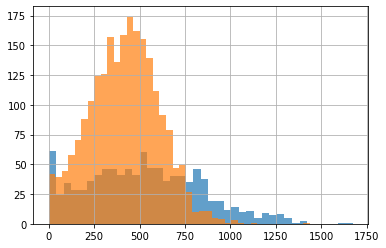


Гистограммы распределения messages_count тарифа Ультра (синий) и тарифа Смарт (оранжевый):


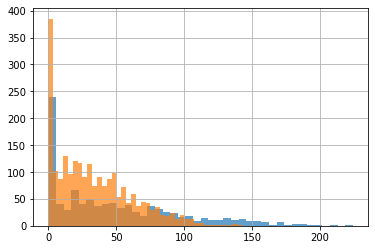


Гистограммы распределения gb_used_sum тарифа Ультра (синий) и тарифа Смарт (оранжевый):


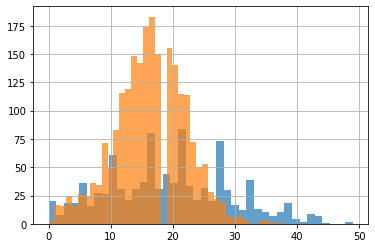

In [43]:
for i in consum_ultra.columns:
    print(f'Гистограммы распределения {i} тарифа Ультра (синий) и тарифа Смарт (оранжевый):')
    consum_ultra[i].hist(bins=40, alpha=0.7)
    consum_smart[i].hist(bins=40, alpha=0.7)
    plt.show()
    print()

По гистограммам мы видим:
1. Пользователей тарифа Смарт, очевидно больше.
2. Среднее время разговора пользователей и средний расход трафика имеют распределения близкие к нормальным для обоих тарифов. Причем данные по тарифу Смарт имеют распределения более близкие к номальным. В данных по тарифу Ультра дисперсия шире.
3. Среднее число отправленных смс сообщений по обоим тарифам имеет распределение Пуассона. Причем большая часть пользователей не использует смс вообще.
4. Среди пользователей тарифа Ультра количество минут разговора за месяц равно 0 кратно чаще, чем среди пользователей Смарта. Пользователи Смарта в основном используют от 150 до 750 минут. Тарифа Ультра от 0 до 1100 минут.
5. Пользователи Тарифа Ультра в среднем используют больше интернет-трафика. Однако, есть пользователи не использующие интернет вообще, но велико число тех, кто расходует свыше 30 Гб в месяц. А в тарифе Смарт число пользователей использующих менее 5 Гб в месяц равно 0, но и более 25 ГБ практически никто не использует.
6. Пользователи тарифа Смарт крайне редко отправляют более 100 смс в месяц. Тарифа Ультра - более 160.

Такой вид гистограмм по тарифу Ультра может быть связан с тем, что число пользователей им более чем в 2 раза меньше, чем у Смарта.

### Вывод

Пользователи тарифа Ультра в среднем используют большее количество каждого вида трафика, однако распределение данных среди пользователей тарифа Ультра характеризуется большей дисперсией. Расходы трафика пользователями Смарта имеют более "нормальный" вид.

Это может быть обусловлено, как особенностями пользователей, так и более низким числом данных по тарифу Ультра.

## Проверка гипотез

Выполним проверку гипотез.
1. Гипотеза № 1: 
    * Нулевая гипотеза: средняя выручка от пользователей тарифов «Ультра» и «Смарт» одинакова;
    * Альтернативаня гипотеза: средняя выручка от пользователей тарифов «Ультра» и «Смарт» различаются;
2. Гипотеза № 2: 
    * Нулевая гипотеза: средняя выручка от пользователей из Москвы равна выручке пользователей из других регионов.
    * Альтернативаня гипотеза: средняя выручка от пользователей из Москвы отличается от выручки пользователей из других регионов.

Воспользуемся тестом Стьюдента для проверки гипотез о равенстве средних двух выборок, т.к. выборки удовлетворяют условиям:
* Генеральные совокупности не зависят друг от друга.
* Выборочные средние нормально распределены, т.к. в выборках больше 900 значений.

Проверим Гипотезу № 1. Для проверки неодхобходимо сгруппировать таблицу `revenue` по столбцу `tariff_name` и посмотреть средние по столбцу `revenue_rub`, а также подготовить 2 выборки с доходом по мясецам для каждого тарифа.

In [44]:
#подготовим 2 выборки с выручкой для анализа
revenue_ultra = revenue.query('tariff_name == "ultra"')['revenue_rub']
revenue_smart = revenue.query('tariff_name == "smart"')['revenue_rub']

#получим среднюю выручку по тарифам
revenue_to_tariff_mean = revenue.groupby('tariff_name')['revenue_rub'].mean()

#посмотрим средние
revenue_to_tariff_mean

tariff_name
smart    1289.973531
ultra    2070.152284
Name: revenue_rub, dtype: float64

Визуально средние сильно разняться.

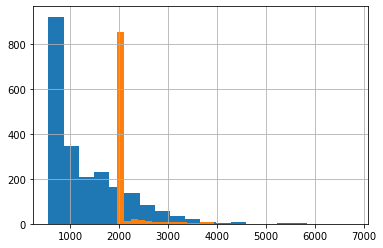

In [45]:
#построим гистогрммы распределения

revenue_smart.hist(bins=20);
revenue_ultra.hist(bins=20);

Выборки имеют распределение Пуассона схожего строения. Дисперсия выборки по тарифу Смарт выглядит существенно большей.

In [46]:
#выполним проверку на равенство средних
alpha = 0.05
results_tariffs = st.ttest_ind(revenue_ultra, revenue_smart, equal_var = False)
print('p-значение:', results_tariffs.pvalue)
if results_tariffs.pvalue < alpha:
    print("На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Cредняя выручка от пользователей тарифов «Ультра» и «Смарт» вероятно различаются.")
else:
    print("На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу. Cредняя выручка от пользователей тарифов «Ультра» и «Смарт» вероятно одинакова.")

p-значение: 4.2606313931076085e-250
На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Cредняя выручка от пользователей тарифов «Ультра» и «Смарт» вероятно различаются.


Дополнительно проверим гипотезу: Средняя выручка от тарифа Ультра выше, чем от тарифа Смарт.
   * Нулевая гипотеза: средняя выручка от пользователей от тарифа Ульта выше, чем от тарифа Смарт.
   * Альтернативаня гипотеза: средняя выручка от пользователей от тарифа Ульта меньше или равна выручке от тарифа Смарт.

In [47]:
if (results_tariffs.pvalue / 2 < alpha) and (revenue_ultra.mean() <= revenue_smart.mean()):
    print("На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Средняя выручка от пользователей от тарифа Ульта вероятно меньше или равна выручке от тарифа Смарт.")
else:
    print("На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу. Средняя выручка от пользователей от тарифа Ульта вероятно выше, чем от тарифа Смарт.")

На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу. Средняя выручка от пользователей от тарифа Ульта вероятно выше, чем от тарифа Смарт.


Проверим Гипотезу № 2. Для проверки неодхобходимо подготовить 2 выборки - с пользователями из Москвы и других городов.

In [48]:
#создадим выбору с приболью от пользователей из Москвы
revenue_moscow = revenue.query('city == "Москва"')['revenue_rub']
#выведем среднее
print(revenue_moscow.mean())

#создадим выбору с приболью от пользователей не из Москвы
revenue_region = revenue.query('city != "Москва"')['revenue_rub']
#выведем среднее
print(revenue_region.mean())

1546.7135842880523
1524.9362274298885


Визуально средние сильно разняться.

<AxesSubplot:>

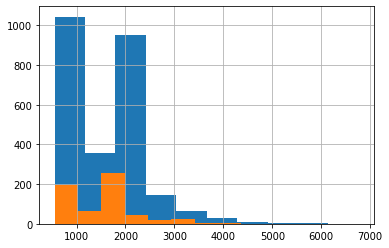

In [49]:
#построим гистогрммы распределения

revenue_region.hist()
revenue_moscow.hist()

Выборки имеют схожий вид, различие в высоте обусловлено разницей в размерах выборок.

In [50]:
#выполним проверку на равенство средних, оставим уровень статистической значимости 0.5
results_city = st.ttest_ind(revenue_region, revenue_moscow)
print('p-значение:', results_city.pvalue)
if results_city.pvalue < alpha:
    print("На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Средняя выручка от пользователей из Москвы вероятно отличается от выручки пользователей из других регионов.")
else:
    print("На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу. Средняя выручка от пользователей из Москвы вероятно равна выручке пользователей из других регионов.")

p-значение: 0.5440152911670223
На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу. Средняя выручка от пользователей из Москвы вероятно равна выручке пользователей из других регионов.


Проверка тестом Стьюдента подвердила выводы визуального анализа.

## Общий вывод

Мы изучили поведение ползователей разных тарифов и выяснили:
1. Пользователей тарифа Смарт больше, чем тарифа Ультра более чем в 2 раза.
2. Большая часть пользователей обоих тарифов не использует смс вообще. 
3. Среди пользователей тарифа Ультра количество минут разговора за месяц равно 0 кратно чаще, чем среди пользователей Смарта. Пользователи Смарта в основном используют от 150 до 750 минут. Тарифа Ультра от 0 до 1100 минут.
5. Пользователи Тарифа Ультра в среднем используют больше интернет-трафика. Однако, есть пользователи не использующие интернет вообще, но велико число тех, кто расходует свыше 30 Гб в месяц. А в тарифе Смарт число пользователей использующих менее 5 Гб в месяц равно 0, но и более 25 ГБ практически никто не использует.
6. Пользователи тарифа Смарт крайне редко отправляют более 100 смс в месяц, тарифа Ультра - более 160.

Мы провели визуальный анализ выборок прибыли, получаемой от пользователей каждого тарифа и проверили эквиволентоность средних с помощью теста Стьюдента.

Установлено:
1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
2. Средняя выручка от пользователей от тарифа Ульта выше, чем от тарифа Смарт.
3. Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

По имеющемся данным делаем вывод о том, что тариф Ультра приносит больше денег.

Также нельзя не отметить, что в среднем пользователи тарифа Смарт превышают тарифную плату более чем в 2 раза (тариф - 550 рублей, средние расходы 1290 р. в месяц).

Пользователи тарифа Ультра практически не выходят за лимит (тариф - 1950 рублей, средние расходы 2070 р. в месяц).

Возможно, стоит задуматься о создании промежуточного тарифа.